In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from plotnine import *

# 아이스크림을 많이 먹으면 걸리는 병 (2)

## 자료생성

기상자료개방포털: https://data.kma.go.kr/cmmn/main.do

In [5]:
_df=pd.read_csv('https://raw.githubusercontent.com/guebin/DV2022/main/posts/temp.csv')
_df

,지점번호,지점명,일시,평균기온(℃),최고기온(℃),최고기온시각,최저기온(℃)
0,146,전주,2020-01-01,-0.5,4.3,15:09,-6.4
1,146,전주,2020-01-02,1.4,6.5,14:12,-3.0
2,146,전주,2020-01-03,2.6,7.6,13:32,-0.5
3,146,전주,2020-01-04,2.0,7.7,13:51,-2.6
4,146,전주,2020-01-05,2.5,8.6,14:05,-3.2
...,...,...,...,...,...,...,...
651,146,전주,2021-10-13,19.9,25.5,14:29,15.6
652,146,전주,2021-10-14,20.4,25.5,13:36,17.0
653,146,전주,2021-10-15,18.3,22.0,13:47,15.7
654,146,전주,2021-10-16,12.8,17.4,0:01,6.5


`-` 평균기온만 선택

In [7]:
pd.Series(_df.columns)

0       지점번호
1        지점명
2         일시
3    평균기온(℃)
4    최고기온(℃)
5     최고기온시각
6    최저기온(℃)
dtype: object

In [11]:
temp=np.array(_df.iloc[:,3])

## 숨은 진짜 상황1: 온도 $\to$ 아이스크림 판매량

`-` 아래와 같은 관계가 있다고 하자

아이스크림 판매량 = 20 + 2 x 온도 + ϵ

In [12]:
np.random.seed(1)
eps = np.random.normal(size=len(temp), scale=10) 
icecream = 20 + 2*temp + eps

Text(0, 0.5, 'icecream')

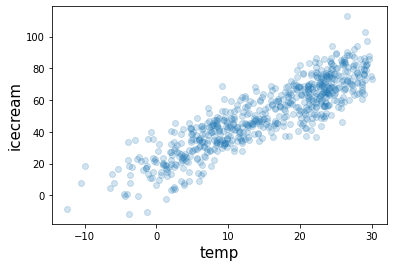

In [16]:
plt.plot(temp, icecream, 'o', alpha=0.2)
plt.xlabel("temp", size=15)
plt.ylabel("icecream", size=15)

## 숨은 진짜 상황2: 온도 $\to$ 소아마비 반응수치

`-` 아래와 같은 관계가 있다고 하자

소아마비 반응수치 = 30 + 0.5 x 온도 + ϵ

In [17]:
np.random.seed(2) 
eps=np.random.normal(size=len(temp),scale=1)
disease= 30 + 0.5 * temp + eps

Text(0, 0.5, 'disease')

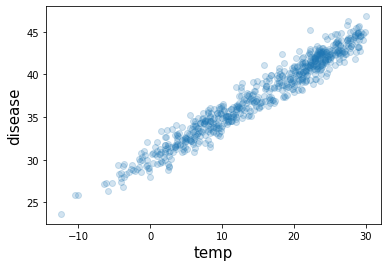

In [18]:
plt.plot(temp, disease, 'o', alpha=0.2)
plt.xlabel("temp", size=15)
plt.ylabel("disease", size=15)

## 우리가 관측한 상황 (온도는 은닉되어 있음)

Text(0, 0.5, 'disease')

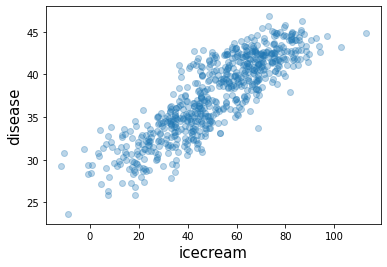

In [19]:
plt.plot(icecream,disease,'o',alpha=0.3)
plt.xlabel("icecream",size=15)
plt.ylabel("disease",size=15)

corr이 높아서 얼핏 생각하면 인과성이 있어보인다.

In [20]:
np.corrcoef(icecream, disease)

array([[1.        , 0.86298975],
       [0.86298975, 1.        ]])

corr = 0.86 

## 직관: 여름만 뽑아서 plot해보자

`-` temp>25 (여름으로 간주) 인 관측치만 plot

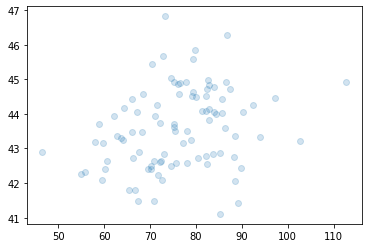

In [23]:
plt.plot(icecream[temp>25], disease[temp>25], 'o', alpha=0.2)

상관관계가 없어보인다?

In [24]:
np.corrcoef(icecream[temp>25], disease[temp>25])

array([[1.        , 0.26612659],
       [0.26612659, 1.        ]])

`-` 전체적인 산점도

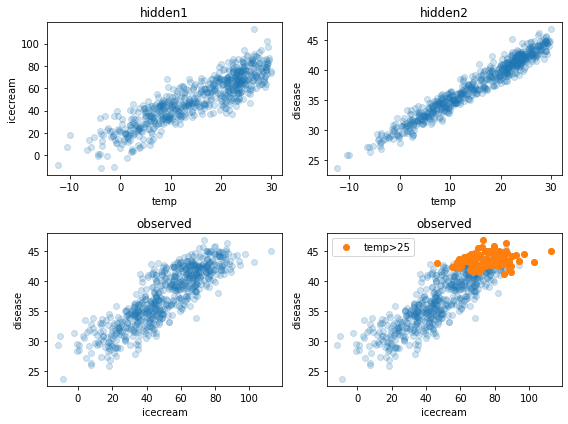

In [25]:
fig , ((ax1,ax2), (ax3,ax4)) = plt.subplots(2,2,figsize=(8,6)) 
ax1.plot(temp,icecream,'o',alpha=0.2); ax1.set_xlabel('temp'); ax1.set_ylabel('icecream'); ax1.set_title("hidden1")
ax2.plot(temp,disease,'o',alpha=0.2); ax2.set_xlabel('temp'); ax2.set_ylabel('disease'); ax2.set_title("hidden2")
ax3.plot(icecream,disease,'o',alpha=0.2); ax3.set_xlabel('icecream'); ax3.set_ylabel('disease'); ax3.set_title("observed")
ax4.plot(icecream,disease,'o',alpha=0.2); ax4.set_xlabel('icecream'); ax4.set_ylabel('disease'); ax4.set_title("observed")
ax4.plot(icecream[temp>25],disease[temp>25],'o',label='temp>25')
ax4.legend()
fig.tight_layout()

## ggplot: 온도구간을 세분화 하여 시각화

`-` 목표: 모든 온도구간에 대하여 각각 색을 다르게 하여 그려보자.

- 사실 지금 변수는 온도, 아이스크림판매량, 소아마비
- 온도가 유사한 지역을 색으로 묶으면 3차원 플랏이 가능함

## df로 자료정리

In [26]:
df=pd.DataFrame({'temp':temp, 'icecream':icecream, 'disease' : disease})
df

,temp,icecream,disease
0,-0.5,35.243454,29.333242
1,1.4,16.682436,30.643733
2,2.6,19.918282,29.163804
3,2.0,13.270314,32.640271
4,2.5,33.654076,29.456564
...,...,...,...
651,19.9,68.839992,39.633906
652,20.4,76.554679,38.920443
653,18.3,68.666079,39.882650
654,12.8,42.771364,36.613159


### 구간세분화

온도를 봄 여름 가을 경루.. 확인하기 위해 구간을 확인하자

(array([  3.,   9.,  29.,  60.,  92.,  86.,  65.,  93., 139.,  80.]),
 array([-12.4 ,  -8.16,  -3.92,   0.32,   4.56,   8.8 ,  13.04,  17.28,
         21.52,  25.76,  30.  ]),
 <BarContainer object of 10 artists>)

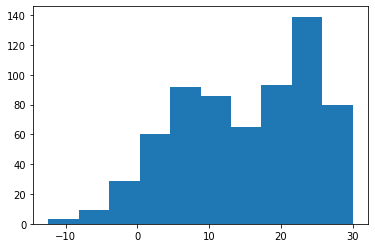

In [28]:
plt.hist(df.temp)

<AxesSubplot:>

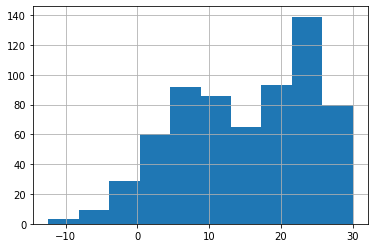

In [30]:
df.temp.hist() # 위에도 되고 이거도 되고

`-` 구간을 5정도로 하면 적당

In [31]:
def cut(x): #
    if x<0: 
        y='Temp: <0'
    elif x<5: 
        y='Temp: 0~5'
    elif x<10: 
        y='Temp: 5~10'
    elif x<15: 
        y='Temp: 10~15'
    elif x<20:
        y='Temp: 15~20'
    elif x<25: 
        y='Temp: 20~25'
    else: 
        y='Temp: >30'
    return y 

In [32]:
df.temp

0      -0.5
1       1.4
2       2.6
3       2.0
4       2.5
       ... 
651    19.9
652    20.4
653    18.3
654    12.8
655     6.7
Name: temp, Length: 656, dtype: float64

In [33]:
cut(-0.5)

'Temp: <0'

In [34]:
cut(4)

'Temp: 0~5'

In [37]:
df.assign(temp2=list(map(cut,df.temp)))

,temp,icecream,disease,temp2
0,-0.5,35.243454,29.333242,Temp: <0
1,1.4,16.682436,30.643733,Temp: 0~5
2,2.6,19.918282,29.163804,Temp: 0~5
3,2.0,13.270314,32.640271,Temp: 0~5
4,2.5,33.654076,29.456564,Temp: 0~5
...,...,...,...,...
651,19.9,68.839992,39.633906,Temp: 15~20
652,20.4,76.554679,38.920443,Temp: 20~25
653,18.3,68.666079,39.882650,Temp: 15~20
654,12.8,42.771364,36.613159,Temp: 10~15


### ggplot

/home/koinup4/anaconda3/envs/py37/lib/python3.7/site-packages/plotnine/stats/smoothers.py:311: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.


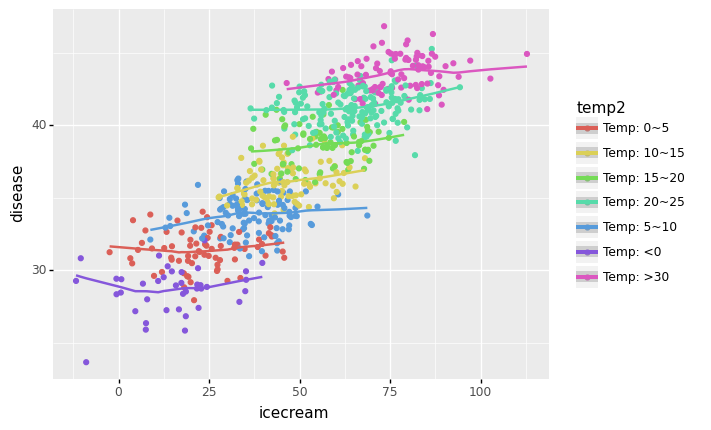

<ggplot: (8764688308729)>

In [43]:
fig = ggplot(data=df.assign(temp2=list(map(cut,df.temp))))
p1 = geom_point(aes(x='icecream', y='disease', color='temp2'))
l1 = geom_smooth(aes(x='icecream', y='disease', color='temp2')) # color별 추체선
fig+p1+l1

- 각 온도별로 추세선 기울기가 거의 0이다. $\to$ 온도가 비슷한 구간별로 묶어서 보니까 상관관계가 없다는 것!

- 아이스크림 판매량과 소아마비의 corr은 유의미해 보였지만, 온도를 통제하였을 경우 아이스크림의 판매량과 소아마비 반응수치의 corr은 유의미해보이지 않다.

### 해석

`-` 해피앤딩: 온도를 통제하니까 아이스크림과 질병은 관련이 없어보인다. $\to$ 아이스크림을 먹으면 소아마비를 유발한다는 이상한 결론이 나올뻔 했지만 우리는 온도라는 흑막을 잘 찾았고 결과적으로 “온도->아이스크림판매량,소아마비” 이라는 합리적인 진리를 얻을 수 있었다.

- 온도와 같은 변수를 은닉변수라고 한다.

`-` 또 다른 흑막? 고려할 흑막이 온도뿐이라는 보장이 어디있지? 사실 흑막2, 흑막3이 있어서 그런 흑막들을 고려하다보니까 아이스크림과 소아마비사이의 상관관계가 다시 보이면 어떡하지?

- 이러한 이유 때문에 상관계수로 인과성을 유추하는건 사실상 불가능.

- 그런데 이론적으로는 “세상의 모든 은닉변수를 통제하였을 경우에도 corr(X,Y)의 값이 1에 가깝다면 그때는 인과성이 있다고 봐도 무방함, (물론 이 경우에도 무엇이 원인인지는 통계적으로 따지는것이 불가)” 이라고 주장할 수 있다. 즉 모든 흑막을 제거한다면 “상관성=인과성”이다.

`-` 실험계획법, 인과추론: 세상의 모든 흑막을 제거하는건 상식적으로 불가능

- 피셔의주장(실험계획법): 그런데 실험계획을 잘하면 흑막을 제거한 효과가 있음 (무작위로 사람뽑아서 담배를 피우게 한다든가)

- 인과추론: 실험계획이 사실상 불가능한 경우가 있음 $\to$  모인 데이터에서 최대한 흑막2,3,4,.. 등이 비슷한 그룹끼리 “매칭”을 시킨다!

실험계획법 - 내가 데이터를 모아야함/ 잘 생각해서 계획적으로

인과추론 - 모인데이터를 활용 / 데이터의 양이 많아야하는 다넘이 있지만 실험은 하지 않아도 된다는 장점

## 만약 아이스크림과 소아마비가 관련있는 경우라면?

`-` 온도는 아이스크림 판매에 여전히 영향을 주지만

아이스크림 판매량 = 20 + 2 x 온도 + ϵ

In [44]:
np.random.seed(1)
eps=np.random.normal(size=len(temp), scale=10) 
icecream = 20 + 2 * temp + eps 

`-` 수영장이 원인이 아니라 진짜 아이스크림을 먹고 소아마비에 걸린상황이라면?

소아마비 반응수치 = 30 + 0 x 온도 + 0.15 x 아이스크림판매랑 + ϵ

In [45]:
np.random.seed(2) 
eps = np.random.normal(size=len(temp),scale=2)
disease= 30+ 0*temp + 0.15*icecream + eps

In [46]:
df2=pd.DataFrame({'temp':temp,'icecream':icecream,'disease':disease})
df2.assign(temp2=list(map(cut,df2.temp)))

,temp,icecream,disease,temp2
0,-0.5,35.243454,34.453002,Temp: <0
1,1.4,16.682436,32.389832,Temp: 0~5
2,2.6,19.918282,28.715350,Temp: 0~5
3,2.0,13.270314,35.271089,Temp: 0~5
4,2.5,33.654076,31.461240,Temp: 0~5
...,...,...,...,...
651,19.9,68.839992,39.693811,Temp: 15~20
652,20.4,76.554679,38.924088,Temp: 20~25
653,18.3,68.666079,41.765212,Temp: 15~20
654,12.8,42.771364,36.842022,Temp: 10~15


/home/koinup4/anaconda3/envs/py37/lib/python3.7/site-packages/plotnine/stats/smoothers.py:311: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.


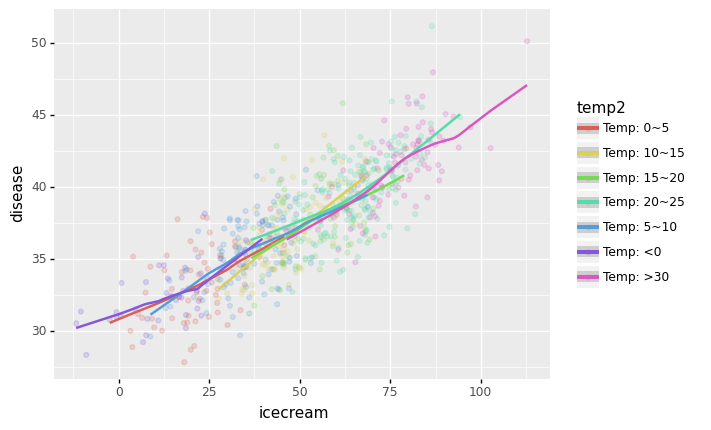

<ggplot: (8764688192609)>

In [47]:
ggplot(data=df2.assign(temp2=list(map(cut,df2.temp))))+\
geom_point(aes(x='icecream',y='disease',colour='temp2'),alpha=0.2)+\
geom_smooth(aes(x='icecream',y='disease',colour='temp2'))

In [48]:
df.corr()

,temp,icecream,disease
temp,1.000000,0.884366,0.975609
icecream,0.884366,1.000000,0.862990
disease,0.975609,0.862990,1.000000


In [49]:
df2.corr()

,temp,icecream,disease
temp,1.000000,0.884366,0.725505
icecream,0.884366,1.000000,0.830539
disease,0.725505,0.830539,1.000000


 단순 corr을 봐서는 “온도->아이스크림,소아마비” 인지, “온도->아이스크림->소아마비” 인지 알기 어렵다.